In [1]:
import numpy as np
import healpy as hp
import pandas as pd
import h5py, os
from astropy.io import fits

from msfm.utils import files

In [2]:
n_side = 512

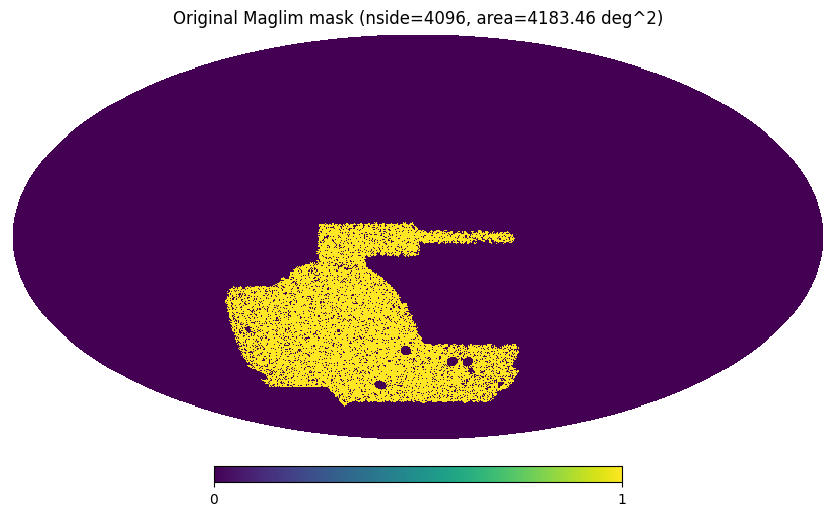

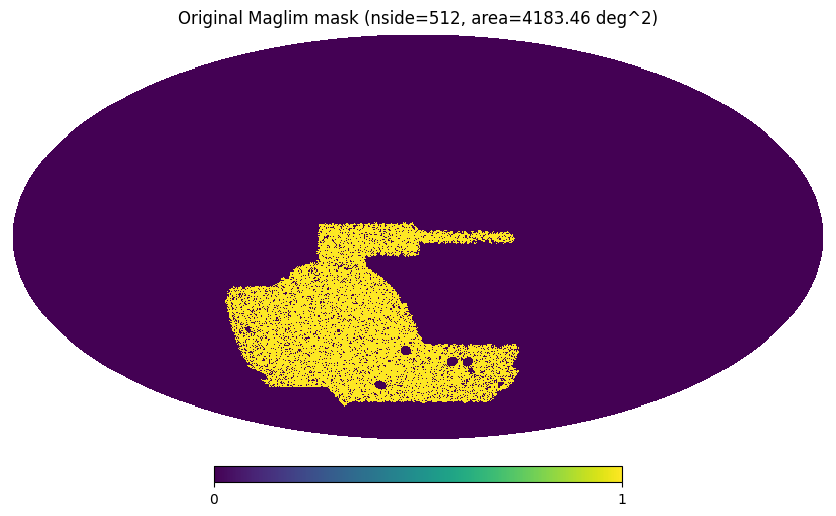

In [3]:
maglim_mask_dir = f"/Users/arne/data/DESY3/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask.fits.gz"

data, header = fits.getdata(maglim_mask_dir, header = True)
mask_inds = data["HPIX"]

maglim_mask = np.zeros(hp.nside2npix(4096))
maglim_mask[mask_inds] = 1
area = len(mask_inds) * hp.nside2pixarea(4096, degrees=True)
hp.mollview(maglim_mask, title=f"Original Maglim mask (nside=4096, area={area:.2f} deg^2)")

maglim_mask_512 = hp.ud_grade(maglim_mask, nside_out=n_side)
area = np.sum(maglim_mask_512) * hp.nside2pixarea(n_side, degrees=True)
hp.mollview(maglim_mask, title=f"Original Maglim mask (nside=512, area={area:.2f} deg^2)")

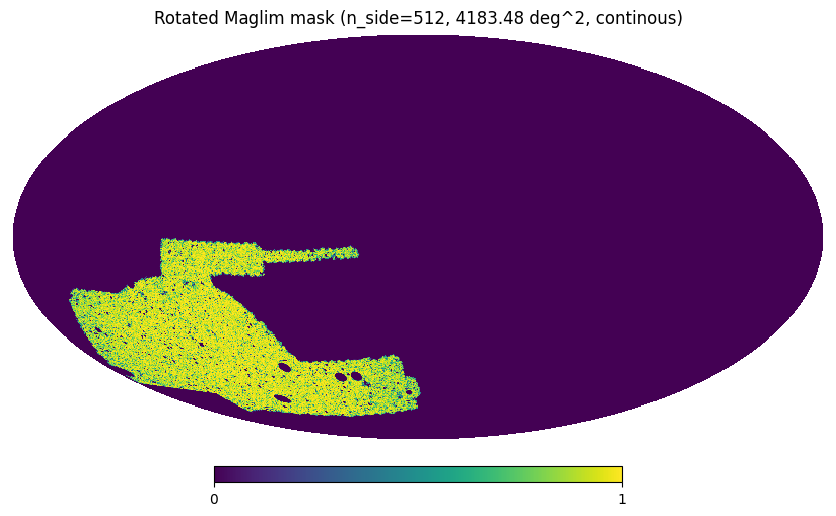

In [4]:
# rotate the mask
rotator = hp.Rotator(rot=(0, 0.125, -1.22), eulertype="Y", deg=False)

rot_maglim_mask = rotator.rotate_map_pixel(maglim_mask)
rot_maglim_mask = hp.ud_grade(rot_maglim_mask, nside_out=n_side)
area = np.sum(rot_maglim_mask) * hp.nside2pixarea(n_side, degrees=True)

hp.mollview(rot_maglim_mask, title=f"Rotated Maglim mask (n_side=512, {area:.2f} deg^2, continous)")

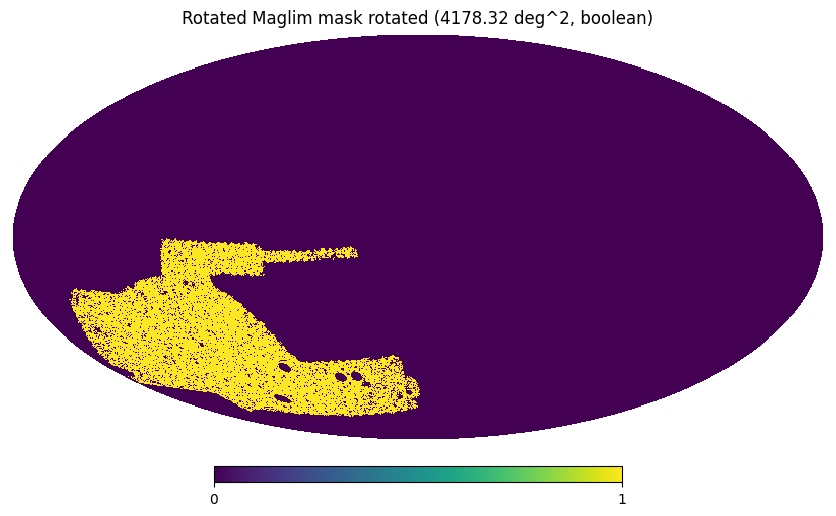

In [5]:
threshold = 0.72
new_maglim_mask = rot_maglim_mask.copy()
new_maglim_mask[new_maglim_mask >= threshold] = 1
new_maglim_mask[new_maglim_mask < threshold] = 0
area = np.sum(new_maglim_mask) * hp.nside2pixarea(512, degrees=True)

hp.mollview(new_maglim_mask, title=f"Rotated Maglim mask rotated ({area:.2f} deg^2, boolean)")